In [7]:
%matplotlib inline
import csv
from datetime import datetime
from urlparse import urlparse
import json
import snap

In [28]:

def extractDomain(rawURL):
	parsedUrl = urlparse(rawURL)
	if parsedUrl.netloc.startswith('www.'):
		return parsedUrl.netloc[4:]
	return parsedUrl.netloc

def isUninteresting(url):
	if 'facebook' in url:
		return True
	elif 'instagram' in url:
		return True
	elif 'twitter' in url:
		return True
	elif 'google' in url:
		return True
	elif 'youtube' in url:
		return True
	elif url == 'https://t.co/':
		return True
	else:
		return False

In [29]:
currIDs = {}
domainToNodeID = {}
years = {}
months = {}
months_graph = {}
domain_counts = {}

progress = 0

for i in [1, 2, 3, 5]: 
    with open("web-2016-09-links-clean-{}.txt".format(i)) as tsvfile:
        linkReader = csv.reader(tsvfile, delimiter='\t')
        for row in linkReader:
            if row[1][:4] == "2016": 
                month = row[1][5:7] 
                if month not in months_graph: 
                    months_graph[month] = snap.TNGraph.New()
                    domainToNodeID[month] = {}
                    currIDs[month] = 0
                curr_graph = months_graph[month]

                fromDomain = extractDomain(row[0])
                
                if isUninteresting(fromDomain):
                    continue
                if fromDomain not in domainToNodeID[month]:
                    domainToNodeID[month][fromDomain] = currIDs[month]
                    curr_graph.AddNode(currIDs[month])
                    currIDs[month] += 1

                uniqueToDomains = set()

                for link in row[2:]:
                    try:
                        toDomain = extractDomain(link)
                        if toDomain not in domain_counts: 
                            domain_counts[toDomain] = 1
                        else:
                            domain_counts[toDomain] += 1
                        if isUninteresting(toDomain):
                            continue
                        if toDomain not in domainToNodeID[month]:
                            domainToNodeID[month][toDomain] = currIDs[month]
                            curr_graph.AddNode(currIDs[month])
                            currIDs[month] += 1
                        if toDomain not in uniqueToDomains:
                            curr_graph.AddEdge(domainToNodeID[month][fromDomain],domainToNodeID[month][toDomain])
                            uniqueToDomains.add(toDomain)
                    except ValueError:
                        pass

In [30]:
clustering_coefficients = {}
for month, graph in months_graph.iteritems(): 
    cf = snap.GetClustCf(graph)
    clustering_coefficients[month] = cf


In [31]:
clustering_coefficients

{'01': 0.001891353450244905,
 '02': 0.003616090255268641,
 '03': 0.003290723742488448,
 '04': 0.0032826025606388187,
 '05': 0.00442643905247299,
 '06': 0.005838177314435403,
 '07': 0.003618975526870447,
 '08': 0.009025451491458468,
 '09': 0.02619637780464157,
 '10': 0.032254849653296044}

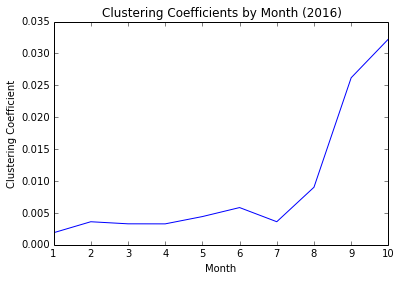

In [32]:
import matplotlib.pylab as plt

lists = sorted(clustering_coefficients.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
x = [int(month) for month in x]

plt.xlabel('Month')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficients by Month (2016)')

plt.plot(x, y)

In [33]:
diameters = {}
for month, graph in months_graph.iteritems(): 
    diam = snap.GetBfsFullDiam(graph, 100, False)
    diameters[month] = diam

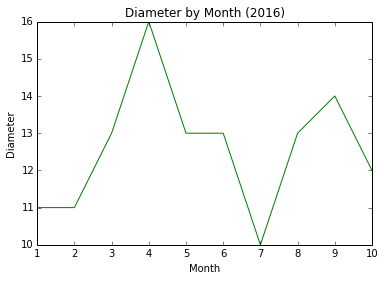

In [35]:
import matplotlib.pyplot as plt


lists = sorted(diameters.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
x = [int(month) for month in x]

month_keys = [int(month) for month in x]
plt.xlabel('Month')
plt.ylabel('Diameter')
plt.title('Diameter by Month (2016)')
plt.plot(month_keys, y, color='g')



In [22]:
month_keys

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [24]:
len(domain_counts)

362563

In [26]:
domain_counts

{'http://s5m14.seesaa.net/': 2,
 'http://toscanoirriverente.tumblr.com/': 3,
 'http://www.bexhillobserver.net/': 37,
 'http://starcancer.tumblr.com/': 2,
 'http://www.davenportfamily.com/': 9,
 'http://www.ellos.fi/': 2,
 'http://photoboothz.wikia.com/': 1,
 'http://www.wildstar-central.com/': 3,
 'http://www.jacarebanguela.com.br/': 12,
 'http://papum-pare.classi4u.com/': 1,
 'http://www.EarthChanges.org/': 14,
 'http://www.comune.roma.it/': 6,
 'http://www.houseweb.com.tw/': 21,
 'http://artozinos.blogspot.com/': 1,
 'http://wirralglobe.co.uk/': 305,
 'https://www.hbbtv.org/': 2,
 'http://academy.hubspot.com/': 1,
 'http://www.ministryofsound.com/': 8,
 'http://notorious-yung-sushi.tumblr.com/': 2,
 'http://kovastudios.com/': 2,
 'http://bonryo.blog6.fc2.com/': 4,
 'http://www.josemarti.cu/': 1,
 'http://fortheloveoftech.com/': 5,
 'http://mostlycajun.com/': 14,
 'http://1.lifether.pay.clickbank.net/': 2,
 'https://ida.stampinup.com/': 1,
 'http://amaterials.exblog.jp/': 1,
 'http://

In [27]:
import pandas as pd

domains = pd.DataFrame.from_dict(domain_counts)

ImportError: No module named pandas

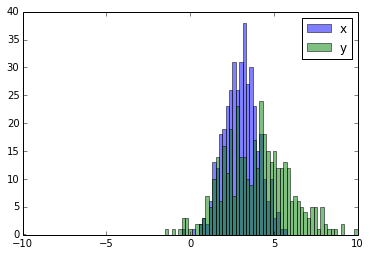

In [36]:
import random
import numpy
from matplotlib import pyplot

x = [random.gauss(3,1) for _ in range(400)]
y = [random.gauss(4,2) for _ in range(400)]

bins = numpy.linspace(-10, 10, 100)

pyplot.hist(x, bins, alpha=0.5, label='x')
pyplot.hist(y, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')

In [37]:
currIDs = {}
domainToNodeID = {}
years = {}
months = {}
months_graph = {}
domain_counts = {}

progress = 0

for i in [1, 2, 3, 5]: 
    with open("web-2016-09-links-clean-{}.txt".format(i)) as tsvfile:
        linkReader = csv.reader(tsvfile, delimiter='\t')
        for row in linkReader:
            if row[1][:4] == "2016": 
                month = int(row[1][5:7])
                if month <= 7:
                    month = 0
                else:
                    month = 1
                if month not in months_graph: 
                    months_graph[month] = snap.TNGraph.New()
                    domainToNodeID[month] = {}
                    currIDs[month] = 0
                curr_graph = months_graph[month]

                fromDomain = extractDomain(row[0])
                
                if isUninteresting(fromDomain):
                    continue
                if fromDomain not in domainToNodeID[month]:
                    domainToNodeID[month][fromDomain] = currIDs[month]
                    curr_graph.AddNode(currIDs[month])
                    currIDs[month] += 1

                uniqueToDomains = set()

                for link in row[2:]:
                    try:
                        toDomain = extractDomain(link)
                        if toDomain not in domain_counts: 
                            domain_counts[toDomain] = 1
                        else:
                            domain_counts[toDomain] += 1
                        if isUninteresting(toDomain):
                            continue
                        if toDomain not in domainToNodeID[month]:
                            domainToNodeID[month][toDomain] = currIDs[month]
                            curr_graph.AddNode(currIDs[month])
                            currIDs[month] += 1
                        if toDomain not in uniqueToDomains:
                            curr_graph.AddEdge(domainToNodeID[month][fromDomain],domainToNodeID[month][toDomain])
                            uniqueToDomains.add(toDomain)
                    except ValueError:
                        pass

In [46]:
from operator import itemgetter
def getDataPointsToPlot(Graph):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph

    return values:
    X: list of degrees
    Y: list of frequencies: Y[i] = fraction of nodes with degree X[i]
    """
    ############################################################################
    # TODO: Your code here!
    X, Y = [], []

    frequencies = []
    for node in Graph.Nodes():
        count = node.GetDeg() 
        frequencies.append(count/float(Graph.GetNodes()))

    return frequencies


def plot_degree_distribution():
    """
    Code for HW1 Q1.1
    """
    global LinkGraph

    points1 = getDataPointsToPlot(months_graph[0])
    points2 = getDataPointsToPlot(months_graph[1])

    plt.hist(points1, 10, alpha=0.5, label='First Half')
    plt.hist(points2, 10, alpha=0.5, label='Second Half')
    plt.legend(loc='upper right')

In [44]:
months_graph[0].GetNodes()

8239

In [45]:
months_graph[1].GetNodes()

371534

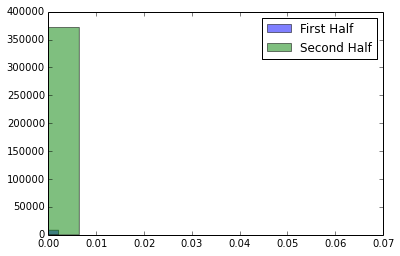

In [47]:
plot_degree_distribution()